In [4]:
import numpy
from scipy.io import FortranFile

fname = "/home/julian/extrepositories/dales_cases/cblstrong/initd03h00mx000y000.001"
f = FortranFile(fname, 'r')
ku = f.read_record(dtype="f8")
kv = f.read_record(dtype="f8")
kw = f.read_record(dtype="f8")
kt = f.read_record(dtype="f8")-273


In [5]:
len(kt)

475300

In [6]:
kkt = numpy.resize(kt, (50,70,70))
(kkt.max())

33.032241806641707

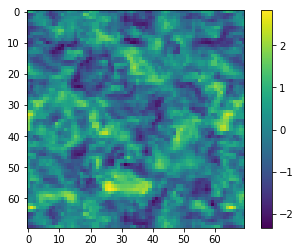

In [12]:
import numpy
kku = numpy.resize(ku, (50,70,70))
kkv = numpy.resize(kv, (50,70,70))
kk = numpy.resize(kw, (50,70,70))
plt.imshow(kku[40,:,:])
plt.colorbar()
X, Y = numpy.mgrid[0:70, 0:70]


plt.contour(X, Y, psi, 
            levels=[-strength_source/2, +strength_source/2], 
            colors='#CD2305', linewidths=2, linestyles='solid');

In [ ]:
import subprocess
import numpy as np
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

outf = 'testB.avi'
rate = 5

cmdstring = ('ffmpeg',
             '-r', '%d' % rate,
             '-f','image2pipe',
             '-vcodec', 'png',
             '-i', 'pipe:', outf
             )
p = subprocess.Popen(cmdstring, stdin=subprocess.PIPE)

frames = 10
for i in range(1, 70):
    print(i)
    plt.figure()
    plt.imshow(kkt[i,:,:])
    plt.savefig(p.stdin, format='png', pad_inches=0.0, bbox_inches='tight')


In [ ]:
import subprocess
cmdstring = ('ffmpeg','-r', '5','-f','image2pipe','-vcodec', 'png', 
             '-i', 'pipe:', "testA.avi")
p = subprocess.Popen(cmdstring, stdin=subprocess.PIPE)
X, Y = numpy.mgrid[0:70, 0:70]
for ik in range(1,50,1):
    print(ik)
    plt.figure(figsize=(11,11), frameon=False)
    Q = plt.quiver(X, Y, kku[ik,:,:], kkv[ik,:,:], color="black", headlength=4, headwidth=2)
    plt.imshow(kk[ik,:,:], cmap=plt.get_cmap("coolwarm"), vmin=-5, vmax=5, interpolation="bilinear")
    plt.title("zslice %d" % ik)
    plt.savefig(p.stdin, format='png', pad_inches=0.0, bbox_inches='tight')
    plt.close()
p.stdin.close()


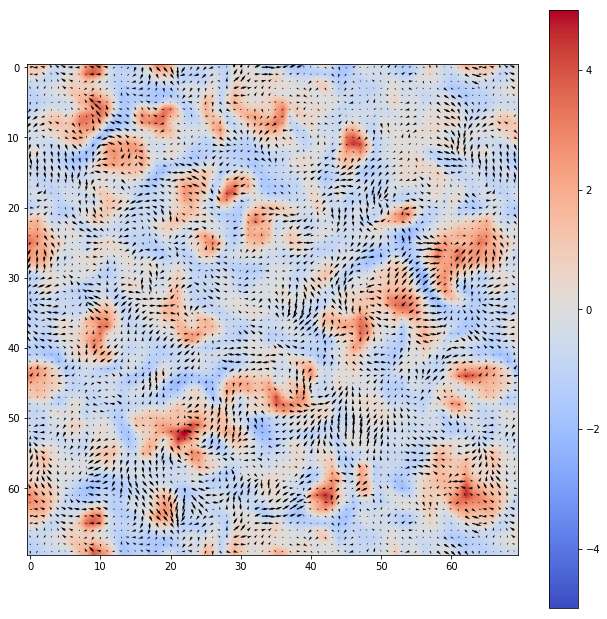

In [14]:
plt.figure(figsize=(11,11), frameon=False)
ik = 40
Q = plt.quiver(X, Y, kku[ik,:,:], kkv[ik,:,:], color="black", headlength=4, headwidth=2)
plt.imshow(kk[ik,:,:], cmap=plt.get_cmap("coolwarm"), vmin=-5, vmax=5, interpolation="bilinear")
plt.colorbar()
plt.savefig("test4.png", format='png', pad_inches=0.0, bbox_inches='tight')

In [ ]:
plt.figure(figsize=(11,11))
ik = 30
plt.streamplot(X, Y, kku[ik,:,:], kkv[ik,:,:], linewidth=1, density=2, arrowstyle='->', arrowsize=1.5)
